# P&D ISSP 2023 - Base notebook
@Students: Edit everything you want!

Packages

In [2]:
import matplotlib
import soundfile
import os
import package.general as genfcns
import package.gui_utils as guifcns
matplotlib.style.use('default')  # <-- for notebooks: white figures background

# Root path (path to where you are storing this very notebook)
#  /!/  Adapt this to your system  /!/ 
ROOTPATH = 'C:/Yani/Signal_Processing_Project'

pathToSoundFiles = f'{ROOTPATH}/sound_files/'

# Parameters
speechfilenames = [
    pathToSoundFiles + 'speech1.wav',
    pathToSoundFiles + 'speech2.wav'
]
noisefilenames = [
    pathToSoundFiles + 'Babble_noise1.wav'
]
signalDuration = 10     # [s]
muGSC = 0.1     # NLMS update constant for freq.-domain GSC

Build acoustic scenario and generate RIRs using GUI

In [3]:
# Launch GUI
guifcns.RIRg_GUI(
    exportFolder=f'{os.getcwd()}/rirs',
    outputRIRplot=False,
    distBwMics=10,  # [cm]
    fs=44100,
    t60=0,
    theme='SystemDefault',
)

Acoustic scenario object containing the RIRs, with parameters:
>> Field "audioCoords": []
>> Field "audioIds": []
>> Field "c": 340
>> Field "distBwMics": 10
>> Field "exportFolder": c:\Yani\Signal_Processing_Project/rirs
>> Field "fs": 44100
>> Field "lineIds": [1, 3, 4, 6, 8, 10, 12, 14, 16, 18]
>> Field "lineTextIds": [2, 5, 7, 9, 11, 13, 15, 17, 19]
>> Field "micsCoords": []
>> Field "micsIds": []
>> Field "nMicsPerArray": 5
>> Field "noiseCoords": []
>> Field "noiseIds": []
>> Field "rirLength": 22050
>> Field "roomDim": 5
>> Field "t60": 0
>> Field "theme": SystemDefault

RIRs selection

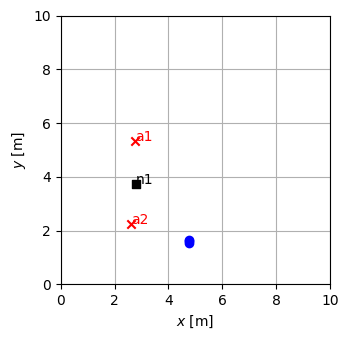

In [4]:
# Select RIRs to be used
# RIR_FILE = 'rirs/'  # use this to input a specific set of RIRs (full path to .pkl.gz file)
RIR_FILE = genfcns.select_latest_rir(path='./rirs/')  # use this to select the lastly generated RIRs
# Load from Pickle archive
acousticScenario = guifcns.load_rirs(path=RIR_FILE)
# Show to user
acousticScenario.plot_asc()

In [5]:
# ... Up to you, now!
roomDim = acousticScenario.roomDim # access the room dimension [m]
print(acousticScenario) # print out all parameters


Acoustic scenario object containing the RIRs, with parameters:
>> Field "audioCoords": [[2.75, 5.3500000000000005], [2.6, 2.25]]
>> Field "audioIds": ['62', '63']
>> Field "c": 340
>> Field "distBwMics": 0.05
>> Field "exportFolder": rirs
>> Field "fs": 44100
>> Field "lineIds": [1, 3, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57]
>> Field "lineTextIds": [2, 5, 7, 9, 11, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58]
>> Field "micsCoords": [[4.75, 1.55], [4.75, 1.6], [4.75, 1.6500000000000001]]
>> Field "micsIds": ['59', '60', '61']
>> Field "nMicsPerArray": 5
>> Field "noiseCoords": [[2.8000000000000003, 3.75]]
>> Field "noiseIds": ['65']
>> Field "numMics": 3
>> Field "rirLength": 22050
>> Field "roomDim": 10.0
>> Field "t60": 1.5
>> Field "theme": DarkAmber



In [ ]:
acousticScenario.RIRsAudio.shape

In [9]:
acousticScenario.RIRsAudio[:,:,1]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.00636513, 0.00620517, 0.00317877],
       [0.00225606, 0.00204122, 0.00048833],
       [0.0084927 , 0.00958939, 0.00858406]])

# Signal processing - Week 2: MUSIC algorithm

In [5]:
import numpy as np

winLength = 1024 # Window length
nSources = acousticScenario.RIRsAudio.shape[-1] +\
    acousticScenario.RIRsNoise.shape[-1] # Number of sources
theta = np.arange(0, np.pi, step=np.pi / 360)  # angles to consider

print('Computing DOAs via freq.-domain MUSIC algorithm...')


# DOAestAll = yourMUSIC() ...
DOAestAll = np.zeros(nSources)  # default


print(f'All estimated DOAs: {DOAestAll * 180/np.pi}')

# ------------------ DOA estimation performance check ------------------
# Oracle selection of the target DOA
DOAest, oracleDOAtalkers = genfcns.oracle_choice_doa(
    DOAestAll, acousticScenario
)
print(f'Oracle-selected estimated DOAs: {DOAest * 180/np.pi}')
# Check validity
genfcns.check_plot_tdoas(DOAest, DOAestAll, acousticScenario)
print(f'Target DOAs estimate error(s): {np.round((DOAest - oracleDOAtalkers) * 180/np.pi, 1)} deg.')

AttributeError: 'NoneType' object has no attribute 'shape'